# Assignment - Irish Population Analysis by Sexes

### Authored by: Stephen Kerr

This assignment is broken down into 3 parts.
1. Differences between the sexes by age in Ireland,
2. Grouped population within 5 years of a given varaible age, then look at the differences between them,
3. Regional Differences between the sexes to identify which region has be biggest difference for a given age group,

This Notebook will be divided into 3 Parts to address each assessment part seperately. But first we will do imports, load the data, explore and clean the data to be ready for analysis.  

The Population data analysis was gathered from the Irish CSO from the 2022 Census.  
See their website [here](https://www.cso.ie/en/index.html).  
Database Code: `FY006A`

## Environemnt Setup

In [1]:
# Imports 

import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt

import os

## Load the Data

In [2]:
url = "https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/FY006A/CSV/1.0/en"
df = pd.read_csv(url)

# output data dir path
output_data_dir = "./assignment05-output-data-assignment05/"

os.makedirs(output_data_dir, exist_ok=True)

df.to_csv(output_data_dir+"raw-population-data.csv")

## Cleaning the data for analysis

In [3]:
# Checking the headers of the dataframe

headers = df.columns.to_list()
headers

['STATISTIC',
 'Statistic Label',
 'TLIST(A1)',
 'CensusYear',
 'C02199V02655',
 'Sex',
 'C02076V03371',
 'Single Year of Age',
 'C03789V04537',
 'Administrative Counties',
 'UNIT',
 'VALUE']

In [4]:
# Dropping unnecessary columns from the dataframe

drop_headers_list = ['STATISTIC',
 'Statistic Label',
 'TLIST(A1)',
 'CensusYear',
 'C02199V02655',
 'C02076V03371',
 'C03789V04537',
 'UNIT',
]
df.drop(columns=drop_headers_list, inplace=True)
df.head()

,Sex,Single Year of Age,Administrative Counties,VALUE
0,Both sexes,All ages,Ireland,5149139
1,Both sexes,All ages,Carlow County Council,61968
2,Both sexes,All ages,Dublin City Council,592713
3,Both sexes,All ages,Dún Laoghaire Rathdown County Council,233860
4,Both sexes,All ages,Fingal County Council,330506


In [5]:
# # Remove 'Both Sexes' from the dataframe for clearer analysis
df = df[df['Sex'] != 'Both sexes']

In [6]:
# Cleaning up the 'Single Age' column

df = df[df["Single Year of Age"] != "All ages"] # Remove the 'All ages' rows
df['Single Year of Age'] = df['Single Year of Age'].str.replace('Under 1 year', '0') # Replace 'Under 1 year' with '0'
df['Single Year of Age'] = df['Single Year of Age'].str.replace(r'\D', '', regex=True) # Remove any non-digit characters using regex
# df['Single Year of Age'].unique() # Check unique values after cleaning

In [7]:
# Converting 'Single Year of Age' to integer type

# df.info() # checking the data types and non-null counts
df['Single Year of Age'] = df['Single Year of Age'].astype('Int64') # Convert 'Single Year of Age' to integer
df.info() # checking the data types and non-null counts after conversion

<class 'pandas.core.frame.DataFrame'>
Index: 6464 entries, 3296 to 9791
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Sex                      6464 non-null   object
 1   Single Year of Age       6464 non-null   Int64 
 2   Administrative Counties  6464 non-null   object
 3   VALUE                    6464 non-null   int64 
dtypes: Int64(1), int64(1), object(2)
memory usage: 258.8+ KB


In [8]:
# ensuring 'VALUE' column is numeric

df['VALUE'] = pd.to_numeric(df['VALUE'], errors='coerce')

### Checking there are no conflicts or duplicating of Data 

In [9]:
admin_districts = df['Administrative Counties'].unique().tolist()
admin_districts

['Ireland',
 'Carlow County Council',
 'Dublin City Council',
 'Dún Laoghaire Rathdown County Council',
 'Fingal County Council',
 'South Dublin County Council',
 'Kildare County Council',
 'Kilkenny County Council',
 'Laois County Council',
 'Longford County Council',
 'Louth County Council',
 'Meath County Council',
 'Offaly County Council',
 'Westmeath County Council',
 'Wexford County Council',
 'Wicklow County Council',
 'Clare County Council',
 'Cork City Council',
 'Cork County Council',
 'Kerry County Council',
 'Limerick City & County Council',
 'Tipperary County Council',
 'Waterford City & County Council',
 'Galway City Council',
 'Galway County Council',
 'Leitrim County Council',
 'Mayo  County Council',
 'Roscommon County Council',
 'Sligo County Council',
 'Cavan County Council',
 'Donegal County Council',
 'Monaghan County Council']

In [10]:
# look at the ireland district data
ireland_data = df[df['Administrative Counties'] == 'Ireland']
ireland_data

,Sex,Single Year of Age,Administrative Counties,VALUE
3296,Male,0,Ireland,29610
3328,Male,1,Ireland,28875
3360,Male,2,Ireland,30236
3392,Male,3,Ireland,31001
3424,Male,4,Ireland,31686
...,...,...,...,...
9632,Female,96,Ireland,956
9664,Female,97,Ireland,732
9696,Female,98,Ireland,492
9728,Female,99,Ireland,336


In [11]:
# checking if the Irleand data matches the total of all admin districts
ireland_total = ireland_data['VALUE'].sum()
regions_total = df.loc[df['Administrative Counties'] != 'Ireland', 'VALUE'].sum()
print(f"If True they are the same: {ireland_total == regions_total}") # should return True if they match 

print(f"Ireland Total: {ireland_total}, Regions Total: {regions_total}")

If True they are the same: True
Ireland Total: 5149139, Regions Total: 5149139


As the Ireland Total is equal to all others we should remove it from the df before running the analysis using the regions total. Note coud just take this to calcualted the weight averages for the Sex but then the regions couldn't be analysised. 

__________________
## Part 1

### Brief: 
> Write a jupyter notebook that analyses the differences between the sexes by age in Ireland.  
> Weighted mean age (by sex)  
> The difference between the sexes by age  
>This part does not need to look at the regions.  

### Observations of the differences between the sexes in Ireland

There are slightly more females (50.58% or 2,604,590) than males (49.42% or 2,544,549) of the total population in Ireland (5,149,139).

#### Weighted mean age (by sex)
- Female weighted age = 38.94 years.
- Male weighted age = 37.74 years.

#### Gender differences by age
- Age with largest female surplus: 39 years with 3,843 more females than males.
- Age with largest male surplus: 10 years with 1,969 more males than females.

Analysing the bar chart 'Population Difference by Age in Ireland (Female - Male)', from ages 0 to 26 there are more males than females, but after 26 years females dominate except for the outlier at age 53. Females specifically dominate from about 27 through the 50s, and females again separate themselves from males in the 70+ age groups.

There are a number of hypotheses that could explain this distribution. For example, perhaps males emigrate in their late 20s and return in their 50s, whereas females do not. Also, females tend to live longer than males, which would explain the difference in the 70+ groups.

The graph of differences aligns with the weighted means, where females on average are older than males.

In [12]:
# Creating a Pivot Table to analyze population by Age and Sex 

# Removing 'Ireland' from the dataframe for analysis
df = df[df['Administrative Counties'] != 'Ireland']

# added .astype(int) to convert float to int as I was getting float values 
sexes_age_pivot = pd.pivot_table(df, 
                            values='VALUE', 
                            index="Single Year of Age", 
                            columns= "Sex",
                            aggfunc=sum
                            ).astype(int) 
# df_analysis.info()

sexes_age_pivot.head()

/tmp/ipykernel_45473/2755330734.py:7: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sexes_age_pivot = pd.pivot_table(df,


Sex,Female,Male
Single Year of Age,,
0,28186,29610
1,27545,28875
2,28974,30236
3,29483,31001
4,29819,31686


In [13]:
# Calculating total population by sex

headers = list(sexes_age_pivot.columns)
# print(headers)

female_population = sexes_age_pivot[headers[0]]
male_population = sexes_age_pivot[headers[1]]


print(f"Total Population: {female_population.sum() + male_population.sum():,}")
print(f"Female Population: {female_population.sum():,}\n" 
      f"Percentage of Females: {(female_population.sum() / (female_population.sum() + male_population.sum())) * 100:.2f}%")
print(f"Male Population: {male_population.sum():,}\n"
      f"Percentage of Males: {(male_population.sum() / (female_population.sum() + male_population.sum())) * 100:.2f}%")


Total Population: 5,149,139
Female Population: 2,604,590
Percentage of Females: 50.58%
Male Population: 2,544,549
Percentage of Males: 49.42%


In [14]:
# calculating the weighted mean for the females & males of all ages (ignoring the administrative district)

weighted_mean_age_female = np.average(sexes_age_pivot.index, weights=female_population)
print(f"Weighted Mean Age - Female: {weighted_mean_age_female:.2f}")

weighted_mean_age_male = np.average(sexes_age_pivot.index, weights=male_population)
print(f"Weighted Mean Age - Male: {weighted_mean_age_male:.2f}")

Weighted Mean Age - Female: 38.94
Weighted Mean Age - Male: 37.74


In [15]:
# computing the other long way as demonstrated in the lecture

female_cumulative_age = sexes_age_pivot[headers[0]].mul(sexes_age_pivot.index, axis=0).sum()
# print(f"Female Cumulative Age Weighted Sum: {female_cumulative_age}")

female_weighted_mean_age = female_cumulative_age / female_population.sum()
print(f"Weighted Mean Age - Female (long way): {female_weighted_mean_age:.2f}")

male_cumulative_age = sexes_age_pivot[headers[1]].mul(sexes_age_pivot.index, axis=0).sum()
# print(f"Male Cumulative Age Weighted Sum: {male_cumulative_age}")

male_weighted_mean_age = male_cumulative_age / male_population.sum()
print(f"Weighted Mean Age - Male (long way): {male_weighted_mean_age:.2f}")

Weighted Mean Age - Female (long way): 38.94
Weighted Mean Age - Male (long way): 37.74


### Looking into the Difference between the two Sexes

In [16]:
# creating a 'Difference (Female - Male)' column to see the difference between females and males

sexes_age_pivot['Difference (Female - Male)'] = female_population - male_population 

# sexes_age_pivot.head()
sexes_age_pivot.to_csv(output_data_dir+"population-by-age-and-sex.csv")

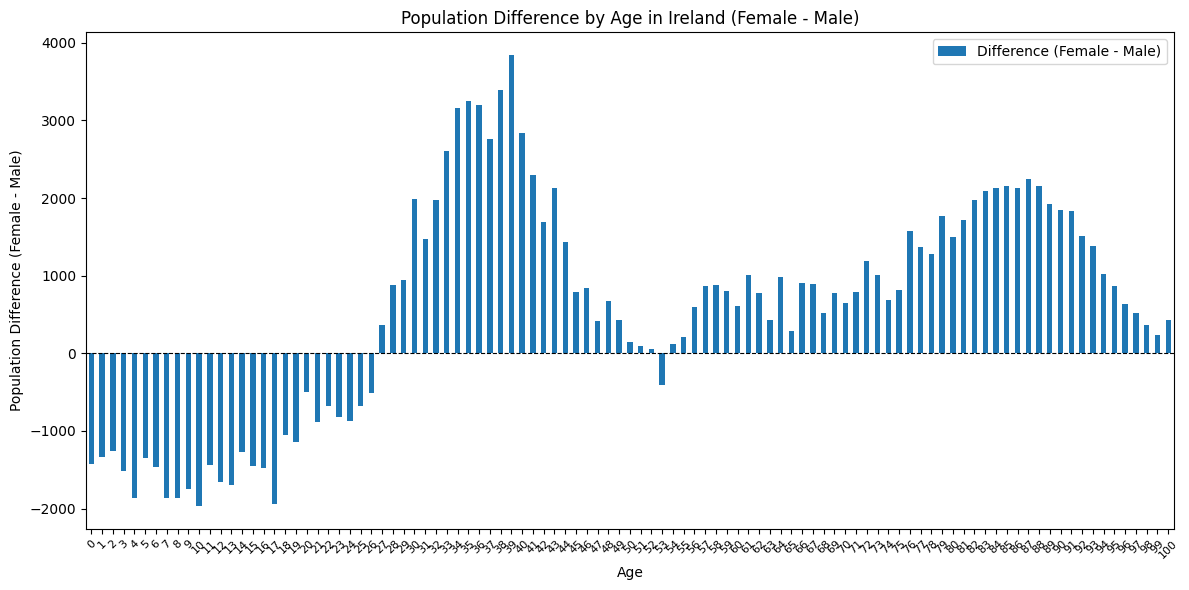

In [17]:
# Visualizing the Difference (Female - Male) on a bar plot

plt.figure(figsize=(12, 6))
sexes_age_pivot['Difference (Female - Male)'].plot(kind='bar')
plt.title('Population Difference by Age in Ireland (Female - Male)')
plt.xlabel('Age')
plt.ylabel('Population Difference (Female - Male)')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()
plt.xticks(rotation=45, fontsize=8, )
plt.tight_layout()
plt.savefig(output_data_dir+"population-difference-by-age-female-minus-male-bar.png")
plt.show()

In [18]:
# Summary of differences
print("\nSummary of gender differences in Ireland:")
print(f"Age with largest female surplus: {sexes_age_pivot['Difference (Female - Male)'].idxmax()} years old.")
print(f"Largest female surplus: {sexes_age_pivot['Difference (Female - Male)'].max():,} more females than males.")
print(f"Age with largest male surplus: {sexes_age_pivot['Difference (Female - Male)'].idxmin()} years old.")
max_male_surplus = abs(sexes_age_pivot['Difference (Female - Male)'].min()) # added as I wanted absolute value
print(f"Largest male surplus: {max_male_surplus:,} more males than females.")


Summary of gender differences in Ireland:
Age with largest female surplus: 39 years old.
Largest female surplus: 3,843 more females than males.
Age with largest male surplus: 10 years old.
Largest male surplus: 1,969 more males than females.


____________________________
## Part 2

### Brief: 
>In the same notebook, make a variable that stores an age (say 35).  
>Write that code that would group the people within 5 years of that age together, into one age group   
>Calculate the population difference between the sexes in that age group.

### Explaining my Code

To run the code, 
1. Change the `Age` Variable to desired value (currently 35),
2. Run the Code Cells in the following order: 
    1. Define your Age Group, -> This code uses the defined age and creates the `Age Group` (which is +- 5 years) using `loc` and the previously created `sexes_age_pivot` DataFrame.
    2. Calculates Population Summary by sex for the age group, 
    3. Calculates the weighted mean for the females & males of the Age Group, 
    4. Bar Chart Visualisation of the Age Group.

In [19]:
# defining an age and grouping people within 5 years of that age together
age = 35
age_group = sexes_age_pivot.loc[age - 5: age + 5]

age_group 

Sex,Female,Male,Difference (Female - Male)
Single Year of Age,,,
30,32841,30858,1983
31,33710,32237,1473
32,34382,32413,1969
33,34489,31888,2601
34,36284,33121,3163
35,37940,34695,3245
36,39030,35828,3202
37,39193,36427,2766
38,40902,37513,3389


In [20]:
# Calculating Population Summary by sex for the age group

headers_pop = list(age_group.columns)
# print(headers_pop)

female_population_age_group = age_group[headers_pop[0]]
male_population_age_group = age_group[headers_pop[1]]

print(f"\nPopulation Summary for Age Group {age - 5} to {age + 5}:\n")
print(f"Total Population: {female_population_age_group.sum() + male_population_age_group.sum():,}")
print(f"Female Population: {female_population_age_group.sum():,}\n" 
      f"Percentage of Females: {(female_population_age_group.sum() 
                                 / (female_population_age_group.sum() + male_population_age_group.sum())) * 100:.2f}%")
print(f"Male Population: {male_population_age_group.sum():,}\n"
      f"Percentage of Males: {(male_population_age_group.sum() 
                               / (female_population_age_group.sum() + male_population_age_group.sum())) * 100:.2f}%")


Population Summary for Age Group 30 to 40:

Total Population: 798,536
Female Population: 414,506
Percentage of Females: 51.91%
Male Population: 384,030
Percentage of Males: 48.09%


In [21]:
# calculating the weighted mean for the females & males of the Age Group

weighted_mean_age_female_in_age_group = np.average(age_group.index, weights=female_population_age_group)
print(f"Weighted Mean Age - Female: {weighted_mean_age_female_in_age_group:.2f}")

weighted_mean_age_male_in_age_group = np.average(age_group.index, weights=male_population_age_group)
print(f"Weighted Mean Age - Male: {weighted_mean_age_male_in_age_group:.2f}")

Weighted Mean Age - Female: 35.29
Weighted Mean Age - Male: 35.26


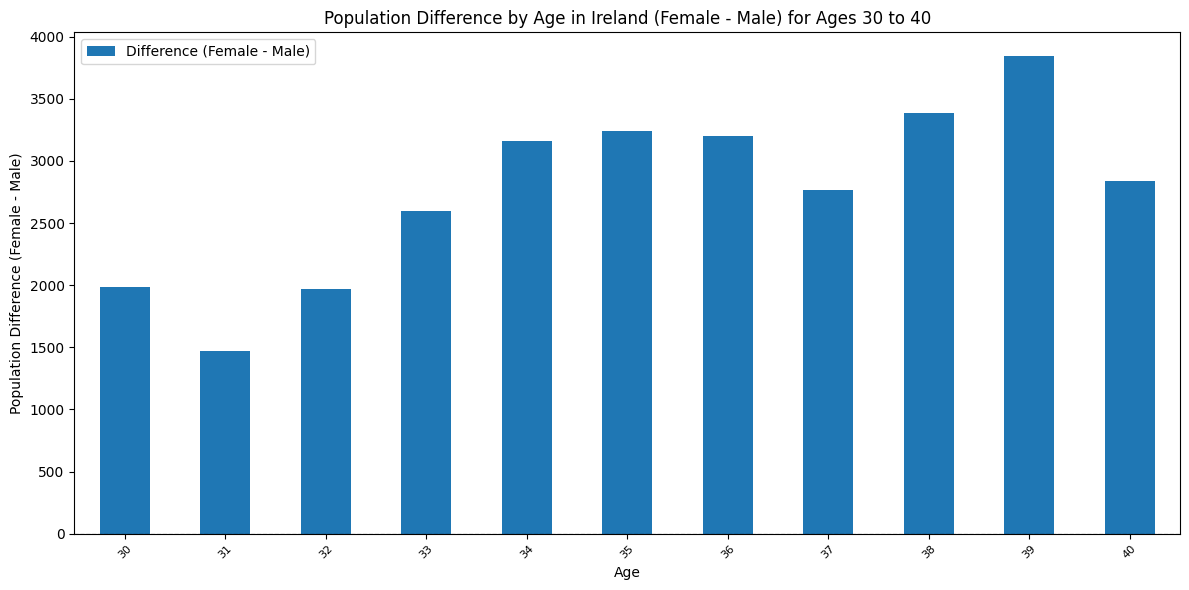

In [22]:
# Visualizing the Difference (Female - Male) on a bar plot for the Age Group

plt.figure(figsize=(12, 6))
age_group['Difference (Female - Male)'].plot(kind='bar')
plt.title(f'Population Difference by Age in Ireland (Female - Male) for Ages {age - 5} to {age + 5}')
plt.xlabel('Age')
plt.ylabel('Population Difference (Female - Male)')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()
plt.xticks(rotation=45, fontsize=8, )
plt.tight_layout()
plt.savefig(output_data_dir+f"population-difference-by-age-female-minus-male-bar-age-group-{age-5}-to-{age+5}.png")
plt.show()

____________________________
## Part 3

### Brief: 
>In the same notebook.  
>Write the code that would work out which region in Ireland has the biggest population difference between the sexes in that age group

### Explaining my Code

To run the code, 
1. Change the `Age` Variable to desired value in Part 2 (currently 35),
2. Run the Code Cells in order: 
    1. Creates the `regional_analysis` pivot table (DataFrame),
    2. Calculates the 'Difference (Female - Male)' and saves the Dataframe to the Output Folder,
    3. Slices the `regional_analysis` for the previously deinfed `Age Group`,
    4. Calculates the weighted mean for the females & males of the Age Group for the various 'Administrative Counties', 
    5. Calculates the 'Difference in Weighted Means (Female - Male)' for each 'Administrative Counties' and the 'Abs Difference in Weighted Means',
    6. Then the Dataframe is saved to the output folder and we identify the Largest Female to Male & Male to Female Difference in Weighted Mean, 
    7. Then we identfy the 'Administrative County' with the highest Absolute Value of the Difference,
    8. Visualize the difference in the weighted means and save the graph to the Output folder, 
    9. Calculates the 'Administrative County' with the Largest Absolute Difference in Population between Female to Male & Male to Female,
    10. Visualize the difference in the Absolute Difference in Populations and save the graph to the Output folder. 

In [23]:
# Create a pivot table to analyze population difference by region for the age group

regional_analysis = pd.pivot_table(df,
                                 values='VALUE',
                                 index=['Administrative Counties', 'Single Year of Age'],
                                 columns='Sex',
                                 aggfunc='sum').astype(int)

In [24]:
# Calculate difference between sexes for each region and age
regional_analysis['Difference (Female - Male)'] = regional_analysis['Female'] - regional_analysis['Male']

regional_analysis.to_csv(output_data_dir+"regional-population-difference-by-age-and-sex.csv")

In [25]:
# selecting the age group from the regional analysis (see docmentation here -> https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.get_level_values.html)
regional_analysis_group = regional_analysis.loc[(regional_analysis.index.get_level_values('Single Year of Age') >= age - 5) &
                                               (regional_analysis.index.get_level_values('Single Year of Age') <= age + 5)]

regional_analysis_group.tail()

Sex                                         Female  Male  \
Administrative Counties Single Year of Age                 
Wicklow County Council  36                    1153   949   
                        37                    1191  1076   
                        38                    1277  1077   
                        39                    1336  1137   
                        40                    1400  1176   

Sex                                         Difference (Female - Male)  
Administrative Counties Single Year of Age                              
Wicklow County Council  36                                         204  
                        37                                         115  
                        38                                         200  
                        39                                         199  
                        40                                         224

In [26]:
# calculate the weighted mean for a given age group for each region

weighted_means = regional_analysis_group.groupby(level=0).apply(
    lambda x: pd.Series({
        'Weighted Mean Female': np.average(x.index.get_level_values('Single Year of Age'), weights=x['Female']),
        'Weighted Mean Male': np.average(x.index.get_level_values('Single Year of Age'), weights=x['Male']),
    })
)

In [27]:
# Calculate the difference in weighted means
weighted_means['Difference in Weighted Means (Female - Male)'] = weighted_means['Weighted Mean Female'] - weighted_means['Weighted Mean Male']

In [28]:
# Absolute value difference in the weighted means 
weighted_means['Abs Difference in Weighted Means'] = weighted_means['Difference in Weighted Means (Female - Male)'].abs()

# save the weighted means to a csv file
weighted_means.to_csv(output_data_dir+f"weighted-means-population-difference-age-group-{age-5}-to-{age+5}.csv")

In [29]:
# top regions for the females and males the difference in weighted means to see which regions have the highest differences
top_by_female = weighted_means['Difference in Weighted Means (Female - Male)'].idxmax()
top_by_female_val = weighted_means['Difference in Weighted Means (Female - Male)'].max()
top_by_male = weighted_means['Difference in Weighted Means (Female - Male)'].idxmin()
top_by_male_val = weighted_means['Difference in Weighted Means (Female - Male)'].min()
top_by_abs = weighted_means['Abs Difference in Weighted Means'].idxmax()
top_by_abs_val = weighted_means['Abs Difference in Weighted Means'].max()

print(f"Top Female > Male (weighted mean diff): {top_by_female}  ({top_by_female_val:.2f} years)")
print(f"Top Male > Female (weighted mean diff): {top_by_male}  ({top_by_male_val:.2f} years)")
print(f"Largest absolute difference: {top_by_abs}  ({top_by_abs_val:.2f} years)")

Top Female > Male (weighted mean diff): Kerry County Council  (0.13 years)
Top Male > Female (weighted mean diff): Leitrim County Council  (-0.14 years)
Largest absolute difference: Leitrim County Council  (0.14 years)


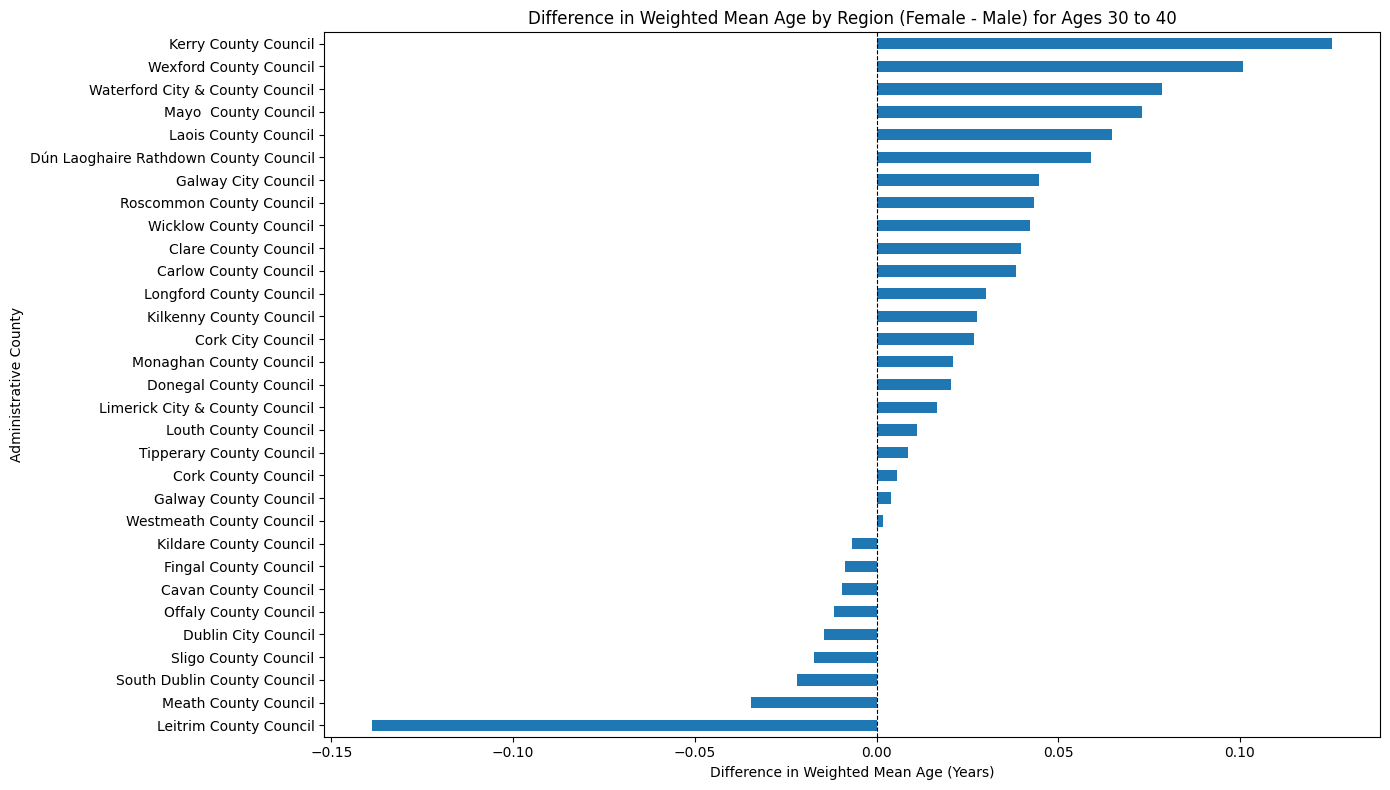

In [37]:
# Visualize weighted mean differences by region
plt.figure(figsize=(14, 8))
weighted_means['Difference in Weighted Means (Female - Male)'].sort_values().plot(kind='barh')
plt.title(f'Difference in Weighted Mean Age by Region (Female - Male) for Ages {age-5} to {age+5}')
plt.xlabel('Difference in Weighted Mean Age (Years)')
plt.ylabel('Administrative County')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.tight_layout()
#plt.savefig(output_data_dir+f"weighted-mean-difference-by-region-age-group-{age-5}-to-{age+5}.png")
plt.show()

In [30]:
# Sum up the population differences across all ages in the age group for each region
regional_pop_diff = regional_analysis_group.groupby(level=0)['Difference (Female - Male)'].sum()

print(f"\nRegion with largest population difference (Female - Male) for ages {age-5} to {age+5}:")
print(f"{regional_pop_diff.idxmax()}: {regional_pop_diff.max():,} more females")
print(f"\nRegion with largest population difference (Male - Female) for ages {age-5} to {age+5}:")
print(f"{regional_pop_diff.idxmin()}: {abs(regional_pop_diff.min()):,} more males")


Region with largest population difference (Female - Male) for ages 30 to 40:
Fingal County Council: 2,942 more females

Region with largest population difference (Male - Female) for ages 30 to 40:
Dublin City Council: 1,036 more males


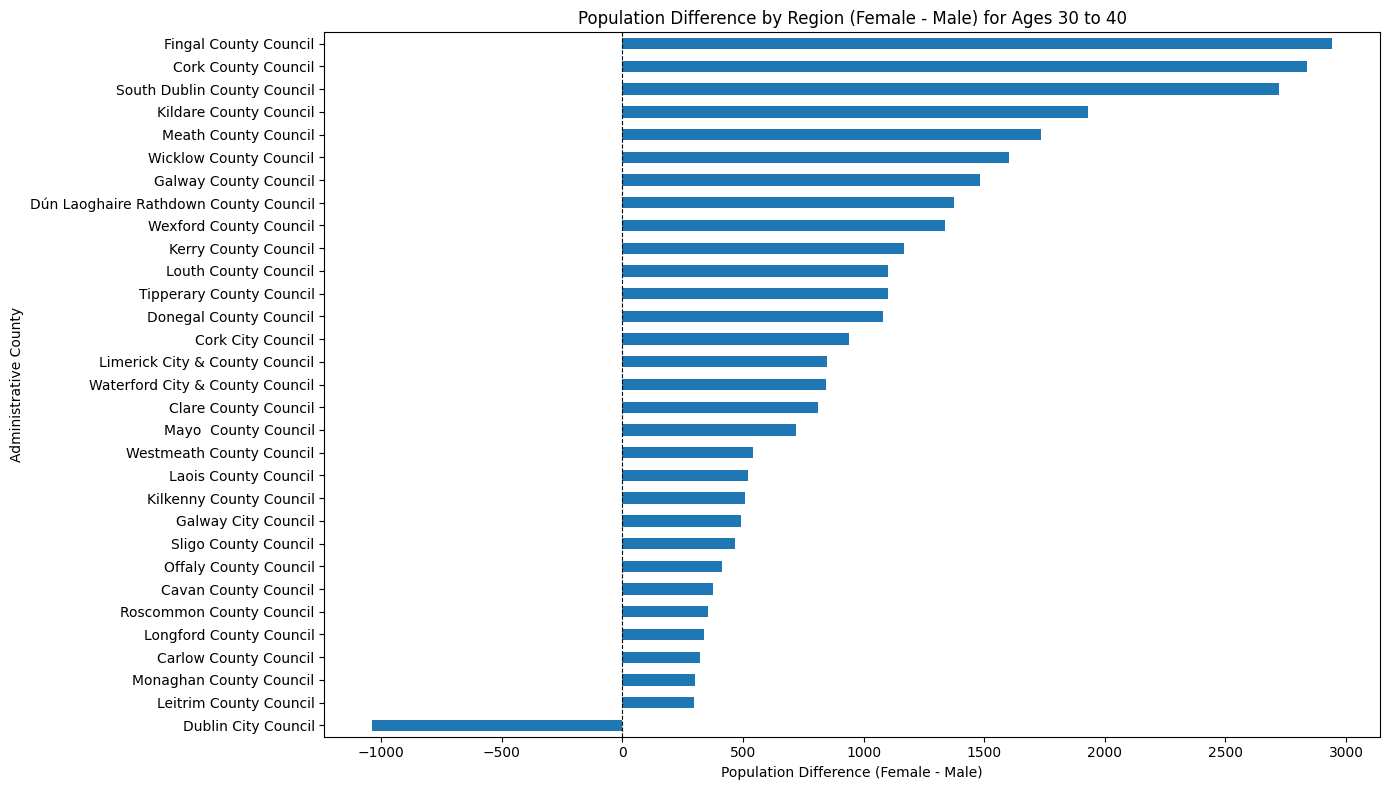

In [ ]:
# Visualize regional population differences
plt.figure(figsize=(14, 8))
regional_pop_diff.sort_values().plot(kind='barh')
plt.title(f'Population Difference by Region (Female - Male) for Ages {age-5} to {age+5}')
plt.xlabel('Population Difference (Female - Male)')
plt.ylabel('Administrative County')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.tight_layout()
# plt.savefig(output_data_dir+f"absolute-regional-population-difference-age-group-{age-5}-to-{age+5}.png")
plt.show()

# End